# Lab 3
This lab is based on material from the reading for this session, Machine Learning with Python, Chapter 2, pp 70-132. You are also encouraged to refer to the code provided from the textbook Github site. For questions 8-11, you need the file, telco.csv.  For question 3 you will need graphviz, which I suggest you install with conda, if you haven't already. See installation instructions here: https://anaconda.org/anaconda/graphviz

### Question 1
Load the breast cancer dataset. Perform a test-train split, and build a Decision Tree Classifier model, with default parameters. Report the accuracy on training and test data.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.909


### Question 2
Write a loop in which you build a Decision Tree Classifier model, with values for the max_depth parameter ranging from 1 to 8. For each iteration, print the max_depth, training accuracy, and test accuracy.  Which model produces the highest accuracy on the test set?

In [7]:
result = []

for md in range(1, 9):    
    tree = DecisionTreeClassifier(max_depth=md, random_state=0)
    tree.fit(X_train, y_train)
    train_tree = tree.score(X_train, y_train)
    test_tree = tree.score(X_test, y_test)
    result.append((train_tree, test_tree, md))
for key in sorted(result, key=lambda e:e[1], reverse=True):
    print(f"Max depth: {key[2]}, Training accuracy: {key[0]}, Test accuracy {key[1]} \n")

Max depth: 2, Training accuracy: 0.9624413145539906, Test accuracy 0.9370629370629371 

Max depth: 3, Training accuracy: 0.9741784037558685, Test accuracy 0.9300699300699301 

Max depth: 4, Training accuracy: 0.9788732394366197, Test accuracy 0.9300699300699301 

Max depth: 5, Training accuracy: 0.9953051643192489, Test accuracy 0.9300699300699301 

Max depth: 6, Training accuracy: 1.0, Test accuracy 0.9090909090909091 

Max depth: 7, Training accuracy: 1.0, Test accuracy 0.9090909090909091 

Max depth: 8, Training accuracy: 1.0, Test accuracy 0.9090909090909091 

Max depth: 1, Training accuracy: 0.9248826291079812, Test accuracy 0.9020979020979021 



### Question 3
Use graphviz to visualize the above decision trees of max_depth 2 and 3.

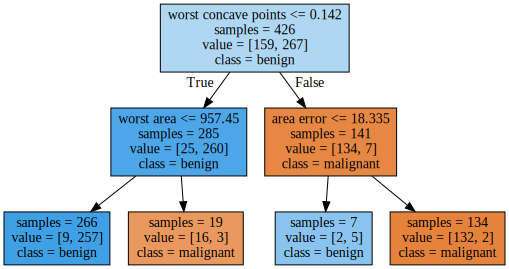

In [12]:
import graphviz
from sklearn.tree import export_graphviz
tree2 = DecisionTreeClassifier(max_depth = 2)
tree3 = DecisionTreeClassifier(max_depth = 3)
tree2.fit(X_train, y_train)
tree3.fit(X_train, y_train)

export_graphviz(tree2, out_file="tree2.dot", class_names=["malignant", "benign"], 
                feature_names=cancer.feature_names, impurity=False, filled=True)

export_graphviz(tree3, out_file="tree3.dot", class_names=["malignant", "benign"], 
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open("tree2.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

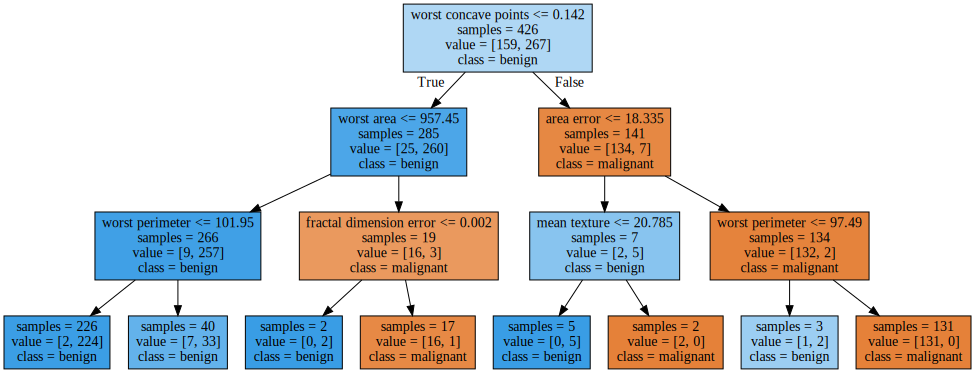

In [13]:
with open("tree3.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### Question 4
Produce a Random Forest Classifier for the Cancer data, with default parameters, and report training and test accuracy.

In [14]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


### Question 5
Produce a Random Forest Classifier for the Cancer data with some different values for max_features. What is the best result on the test data?

In [21]:
rf_result = []
for mf in [1, 2, 3]:
    random_forest = RandomForestClassifier(max_features = mf)
    random_forest.fit(X_train, y_train)
    rf_train = random_forest.score(X_train, y_train)
    rf_test = random_forest.score(X_test, y_test)
    rf_result.append((rf_train, rf_test, mf))
for key in sorted(rf_result, key = lambda e:e[1], reverse=True):
    print(f" Max features: {key[2]}, Training accuracy: {key[0]}, Test accuracy {key[1]}\n")

 Max features: 2, Training accuracy: 1.0, Test accuracy 0.972027972027972

 Max features: 3, Training accuracy: 1.0, Test accuracy 0.972027972027972

 Max features: 1, Training accuracy: 1.0, Test accuracy 0.958041958041958



### Question 6
Produce an MLP Classifier for the Cancer data, with default parameters, and report training and test accuracy.

In [23]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.911
Accuracy on test set: 0.937


### Question 7
Read the telco file and assign all the columns to X, except the column 'Churn', which  you assign to y. Then perform a test train split, setting the parameter: stratify=y.

In [24]:
import pandas as pd
df = pd.read_csv("telco.csv")
X = df.drop(['Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

### Question 8
Produce a Decision Tree Classifier for the telco data. Report training and test results on the default parameters. Try other settings for max_depth as well as any other parameters you think might be relevant. What are the best results you can get?

In [25]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
print("Accuracy on training set (for default): {:.3f}".format(dtc.score(X_train, y_train)))
print("Accuracy on test set (for default): {:.3f}".format(dtc.score(X_test, y_test)))

Accuracy on training set (for default): 1.000
Accuracy on test set (for default): 0.719


In [28]:
dtc_results = []
for md in range(1, 10):
    dtc_md = DecisionTreeClassifier(max_depth = md)
    dtc_md.fit(X_train, y_train)
    train_dtc = dtc_md.score(X_train, y_train)
    test_dtc = dtc_md.score(X_test, y_test)
    dtc_results.append((train_dtc, test_dtc, md))
for key in sorted(dtc_results, key = lambda e:e[1], reverse=True):
    print(f"Max depth: {key[2]}, Training accuracy: {key[0]}, Test accuracy: {key[1]}\n")

Max depth: 6, Training accuracy: 0.8120970800151688, Test accuracy: 0.79806598407281

Max depth: 8, Training accuracy: 0.8308684110731892, Test accuracy: 0.7935153583617748

Max depth: 2, Training accuracy: 0.7899127796738719, Test accuracy: 0.7901023890784983

Max depth: 3, Training accuracy: 0.7899127796738719, Test accuracy: 0.7901023890784983

Max depth: 5, Training accuracy: 0.8014789533560864, Test accuracy: 0.7901023890784983

Max depth: 7, Training accuracy: 0.822715206674251, Test accuracy: 0.7901023890784983

Max depth: 4, Training accuracy: 0.7957906712172924, Test accuracy: 0.7804323094425484

Max depth: 9, Training accuracy: 0.8526734926052332, Test accuracy: 0.773037542662116

Max depth: 1, Training accuracy: 0.7341676147136899, Test accuracy: 0.7343572241183163



### Question 9
Produce a Random Forest Classifier for the telco data. Report training and test results on the default parameters. Try other settings for max_depth as well as any other parameters you think might be relevant. What are the best results you can get?

In [30]:
rfc = RandomForestClassifier().fit(X_train, y_train)
print("Accuracy on training set (for default): {:.3f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test set (for default): {:.3f}".format(rfc.score(X_test, y_test)))

Accuracy on training set (for default): 1.000
Accuracy on test set (for default): 0.799


In [32]:
rfc_results = []
for md in range(1, 20):
    rfc_md = RandomForestClassifier(max_depth = md)
    rfc_md.fit(X_train, y_train)
    train_rfc = rfc_md.score(X_train, y_train)
    test_rfc = rfc_md.score(X_test, y_test)
    rfc_results.append((train_rfc, test_rfc, md))
for key in sorted(rfc_results, key = lambda e:e[1], reverse=True):
    print(f"Max depth: {key[2]}, Training accuracy: {key[0]}, Test accuracy: {key[1]}\n")

Max depth: 11, Training accuracy: 0.9087978763746681, Test accuracy: 0.8037542662116041

Max depth: 10, Training accuracy: 0.8701175578308684, Test accuracy: 0.8026166097838453

Max depth: 12, Training accuracy: 0.9419795221843004, Test accuracy: 0.8014789533560864

Max depth: 8, Training accuracy: 0.8337125521425863, Test accuracy: 0.8003412969283277

Max depth: 9, Training accuracy: 0.8477436480849451, Test accuracy: 0.8003412969283277

Max depth: 14, Training accuracy: 0.9835039817974972, Test accuracy: 0.7997724687144482

Max depth: 19, Training accuracy: 1.0, Test accuracy: 0.7997724687144482

Max depth: 5, Training accuracy: 0.7974971558589306, Test accuracy: 0.79806598407281

Max depth: 6, Training accuracy: 0.8071672354948806, Test accuracy: 0.7974971558589306

Max depth: 7, Training accuracy: 0.8168373151308305, Test accuracy: 0.7969283276450512

Max depth: 16, Training accuracy: 0.997155858930603, Test accuracy: 0.7957906712172924

Max depth: 17, Training accuracy: 0.99962078

### Question 10
Produce an MLP Classifier for the telco data. Report training and test results on the default parameters. (Optional: Try other settings for alpha as well as any other parameters you think might be relevant. What are the best results you can get?)

In [33]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.788
Accuracy on test set: 0.783


In [36]:
mlp_results = []
for ap in [0.0001, 0.001, 0.01, 0.1, 1]:
    mlp_ap = MLPClassifier(alpha = ap)
    mlp_ap.fit(X_train, y_train)
    trainmlp_res = mlp_ap.score(X_train, y_train)
    testmlp_res = mlp_ap.score(X_test, y_test)
    mlp_results.append((trainmlp_res, testmlp_res, ap))
for key in sorted(mlp_results, key = lambda e:e[1], reverse=True):
    print(f"alpha: {key[2]}, training accuracy: {key[0]}, test accuracy: {key[1]} \n")

alpha: 0.01, training accuracy: 0.7846037163443307, test accuracy: 0.7923777019340159 

alpha: 0.1, training accuracy: 0.7817595752749337, test accuracy: 0.7696245733788396 

alpha: 1, training accuracy: 0.7631778536215397, test accuracy: 0.7650739476678043 

alpha: 0.001, training accuracy: 0.7502844141069397, test accuracy: 0.7474402730375427 

alpha: 0.0001, training accuracy: 0.7408039438756162, test accuracy: 0.7394766780432309 

